In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.getcwd()) 

C:\Users\matze\Documents\Winton\CRISPDM


In [27]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test_2.csv', index_col=0)

In [111]:
minute_past = train.loc[:,'Ret_2':'Ret_120']+1
minute_fut = train.loc[:,'Ret_121':'Ret_180']+1
minute_past_test = test.loc[:,'Ret_2':'Ret_120']+1

In [112]:
features = pd.DataFrame()
features['Feature_5'] = train.Feature_5.copy()
features['Feature_7'] = train.Feature_7.copy()

features['Ret_MinusOne'] = train.Ret_MinusOne.copy()
features['Ret_MinusTwo'] = train.Ret_MinusTwo.copy()
features['Ret_MinutePast'] = minute_past.prod(axis=1)-1
features['Ret_MinutePast_Test'] = minute_past_test.prod(axis=1)-1
#target
target = pd.DataFrame()
target['Ret_MinuteFut'] = minute_fut.prod(axis=1)-1
target['Ret_PlusOne'] = train.Ret_PlusOne.copy()
target['Ret_PlusTwo'] = train.Ret_PlusTwo.copy()

#both
both = pd.concat([features,target], axis=1)


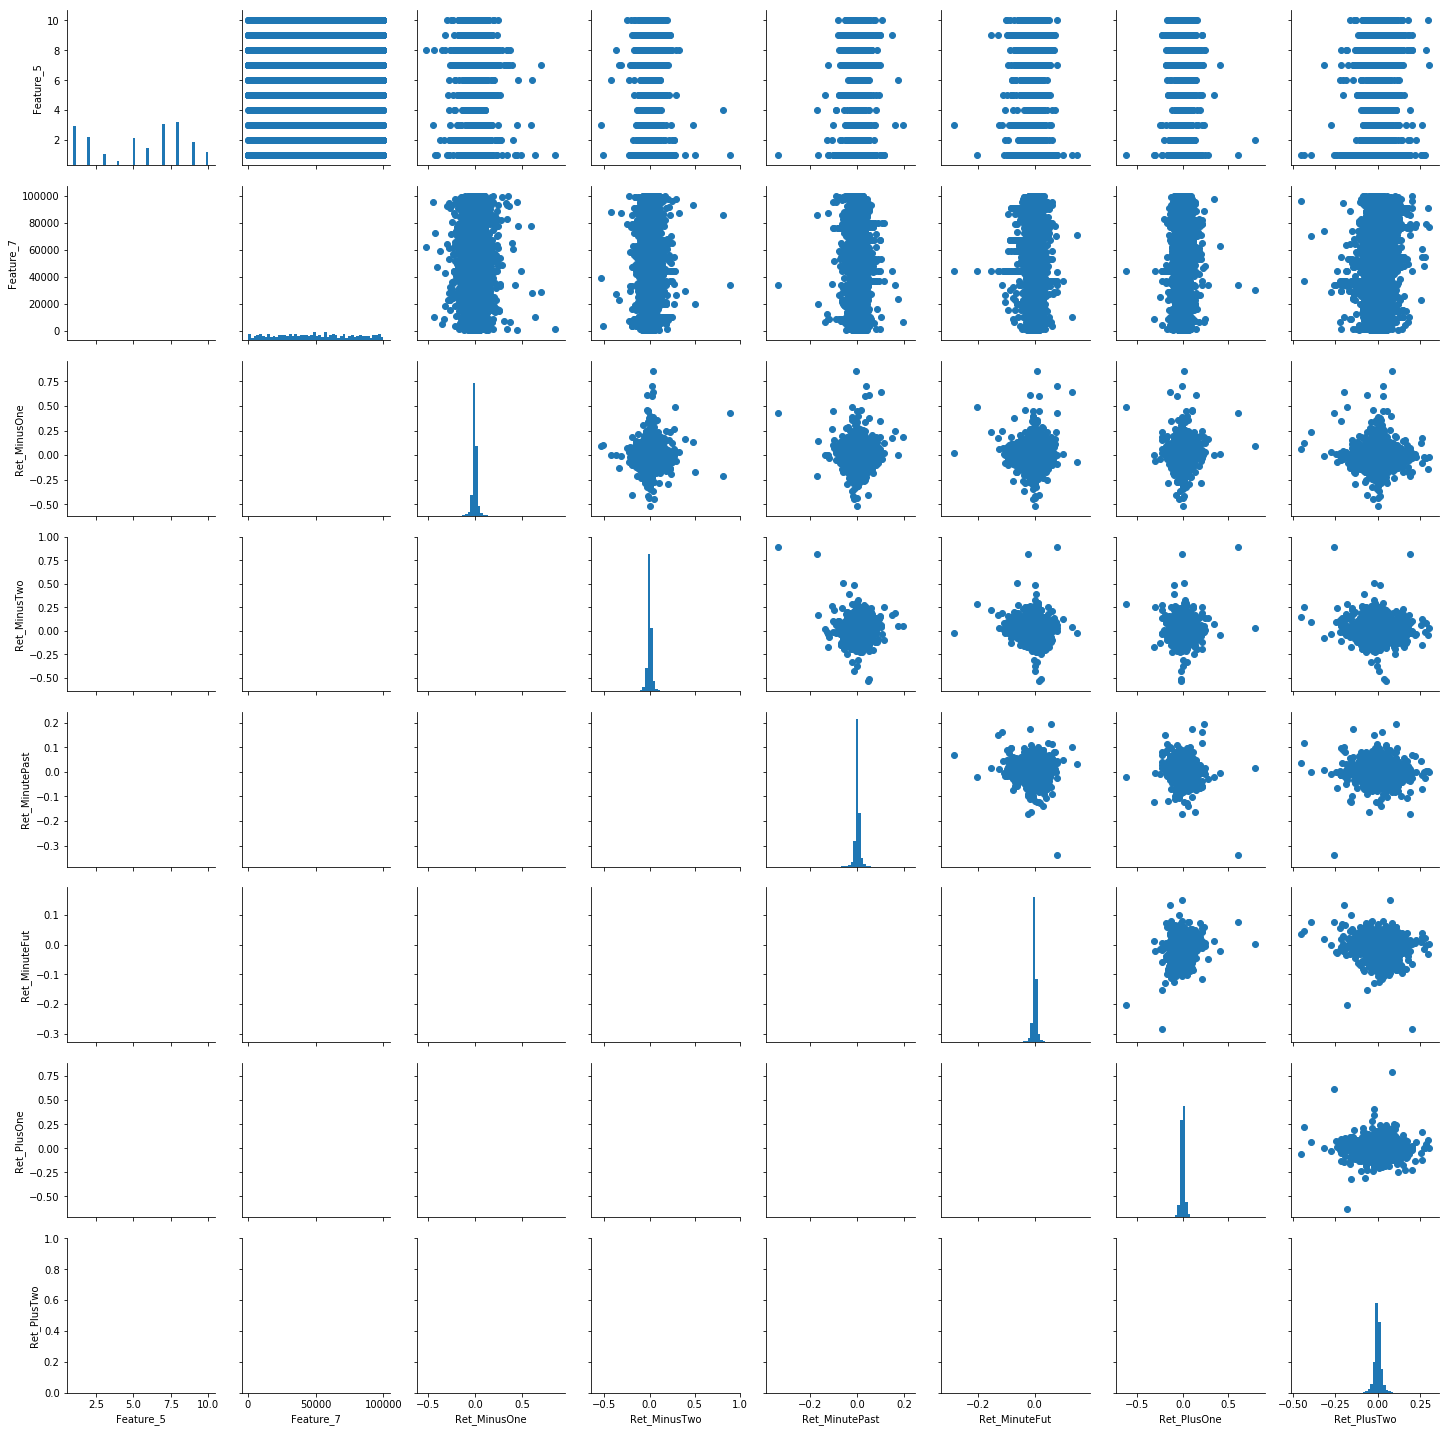

In [43]:
grid = sns.PairGrid(data= both)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter)
#grid = grid.map_upper(corr)
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 50);

# Missing Values

In [30]:
train_missing = pd.DataFrame(train.loc[:,'Feature_1' : 'Feature_25'].isna().sum().sort_values(ascending=True)/40000)
train_missing.columns = ['Values']

test_missing = pd.DataFrame(test.loc[:,'Feature_1' : 'Feature_25'].isna().sum().sort_values(ascending=True)/120000)
test_missing.columns = ['Values']


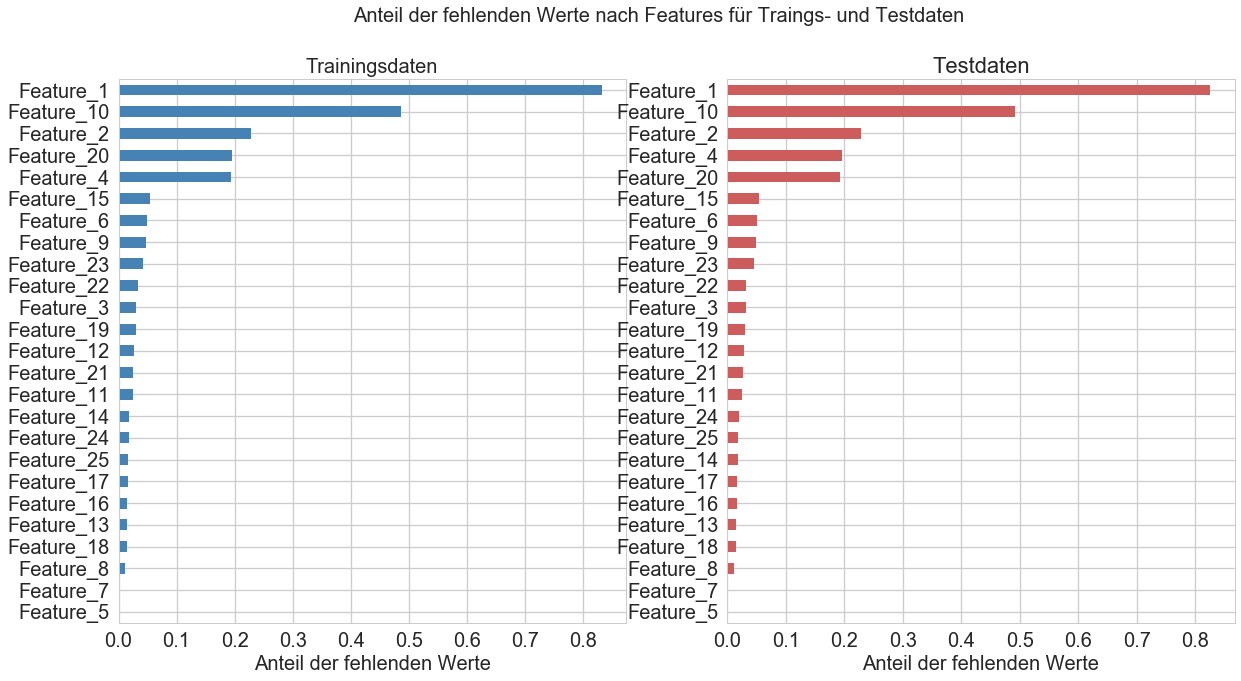

In [31]:
sns.set(style="whitegrid")
sns.set_context("talk")
fig, [ax1, ax2] = plt.subplots(1, 2,figsize=(20, 10))


#fig.savefig('example.png')
train_missing.plot.barh(ax=ax1,use_index=True, color= 'steelblue', legend=False,fontsize =20)
test_missing.plot.barh(ax=ax2,use_index=True, color='indianred', legend=False,fontsize =20)
ax1.set_title('Trainingsdaten',fontsize=20)
ax1.set_xlabel('Anteil der fehlenden Werte',fontsize=20)

ax2.set_title('Testdaten',fontsize=22)
ax2.set_xlabel('Anteil der fehlenden Werte',fontsize=20)

fig.suptitle('Anteil der fehlenden Werte nach Features für Traings- und Testdaten',fontsize=20)

fig.savefig('BA_graphs/Anteil Missing Values.jpeg')


In [33]:
#missing values in daily returns



In [35]:
train.loc[:,['Ret_MinusOne','Ret_MinusTwo']].isna().sum()
test.loc[:,['Ret_MinusOne','Ret_MinusTwo']].isna().sum()

Ret_MinusOne    0
Ret_MinusTwo    0
dtype: int64

In [36]:
display(((train.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)==0).sum()/40000)
display(((train.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)/60).describe())

display(((test.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)==0).sum()/120000)
display(((test.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)/60).describe())

0.55975

count    40000.000000
mean         0.046859
std          0.086997
min          0.000000
25%          0.000000
50%          0.000000
75%          0.050000
max          0.500000
dtype: float64

0.5499833333333334

count    120000.000000
mean          0.048532
std           0.088308
min           0.000000
25%           0.000000
50%           0.000000
75%           0.050000
max           0.500000
dtype: float64

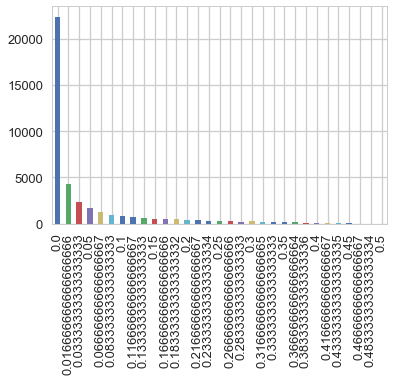

In [37]:
pd.DataFrame(((train.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)/60),columns=['Missing']).Missing.value_counts().sort_index().plot.bar()

In [201]:
df = pd.DataFrame((train.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)/60,columns=['Missing'])
df.loc[df.Missing !=0].describe()

,Missing
count,17610.000000
mean,0.106437
std,0.104164
min,0.016667
25%,0.033333
50%,0.066667
75%,0.150000
max,0.500000


# EDA

## Feature7

In [38]:
both.head()

,Feature_5,Feature_7,Ret_MinusOne,Ret_MinusTwo,Ret_MinutePast,Ret_MinuteFut,Ret_PlusOne,Ret_PlusTwo
Id,,,,,,,,
1,8.0,75751,-0.010770,0.055275,-0.024969,0.000027,-0.019512,0.028846
2,3.0,17369,0.002987,0.009748,-0.008117,0.001084,-0.002939,-0.010253
3,9.0,8277,0.006181,0.003077,-0.000649,-0.000801,-0.024791,0.015711
4,5.0,22508,0.014106,0.000984,0.001272,0.000330,-0.005680,-0.002190
5,7.0,22423,0.011065,-0.018224,-0.002331,0.003651,0.036104,-0.026552


In [39]:
featureset = pd.DataFrame()
featureset = train.loc[:,'Feature_1':'Feature_25']
featureset = pd.concat([featureset,features['Ret_MinusTwo'],features['Ret_MinusOne'],features['Ret_MinutePast'], target], axis=1)
featureset.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_MinutePast,Ret_MinuteFut,Ret_PlusOne,Ret_PlusTwo
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,...,-0.489492,NaN,NaN,NaN,0.055275,-0.010770,-0.024969,0.000027,-0.019512,0.028846
2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,NaN,...,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.008117,0.001084,-0.002939,-0.010253
3,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.0,...,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181,-0.000649,-0.000801,-0.024791,0.015711
4,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.0,...,-2.440799,1.551425,-1.788725,NaN,0.000984,0.014106,0.001272,0.000330,-0.005680,-0.002190
5,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.0,...,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065,-0.002331,0.003651,0.036104,-0.026552


In [40]:
corr = abs(featureset.corr(method='spearman'))

In [41]:
corr

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_MinutePast,Ret_MinuteFut,Ret_PlusOne,Ret_PlusTwo
Feature_1,1.000000,0.101256,0.020642,0.084645,0.081375,0.042524,0.005169,0.007859,0.022768,0.271537,...,0.071381,0.021585,0.129374,0.048939,0.000541,0.006896,0.018862,0.000481,0.010681,0.002571
Feature_2,0.101256,1.000000,0.330397,0.358796,0.075107,0.303465,0.005978,0.011801,0.191281,0.029853,...,0.253031,0.266145,0.262671,0.055278,0.001488,0.006907,0.003850,0.003841,0.005771,0.000822
Feature_3,0.020642,0.330397,1.000000,0.806204,0.075693,0.656111,0.001966,0.005404,0.475210,0.069974,...,0.717146,0.754826,0.608390,0.694400,0.005235,0.008194,0.007369,0.008907,0.013412,0.003293
Feature_4,0.084645,0.358796,0.806204,1.000000,0.272539,0.585513,0.010436,0.007536,0.466141,0.037813,...,0.675921,0.674472,0.599740,0.617307,0.007144,0.015844,0.004893,0.002415,0.012262,0.004011
Feature_5,0.081375,0.075107,0.075693,0.272539,1.000000,0.284945,0.000111,0.005341,0.208990,0.125295,...,0.028679,0.033883,0.174579,0.103634,0.006459,0.008465,0.000340,0.008883,0.000777,0.008165
Feature_6,0.042524,0.303465,0.656111,0.585513,0.284945,1.000000,0.000627,0.000514,0.462595,0.018117,...,0.410796,0.609467,0.459365,0.503043,0.003188,0.005092,0.007189,0.002174,0.009628,0.001678
Feature_7,0.005169,0.005978,0.001966,0.010436,0.000111,0.000627,1.000000,0.001284,0.001876,0.007187,...,0.003064,0.001003,0.003282,0.003850,0.030177,0.013615,0.016500,0.001855,0.000344,0.024558
Feature_8,0.007859,0.011801,0.005404,0.007536,0.005341,0.000514,0.001284,1.000000,0.016481,0.010447,...,0.004389,0.007383,0.007179,0.001900,0.002694,0.008999,0.006372,0.000744,0.003671,0.000534
Feature_9,0.022768,0.191281,0.475210,0.466141,0.208990,0.462595,0.001876,0.016481,1.000000,0.009773,...,0.353225,0.428533,0.343453,0.387871,0.005530,0.006176,0.006150,0.003883,0.000545,0.000173
Feature_10,0.271537,0.029853,0.069974,0.037813,0.125295,0.018117,0.007187,0.010447,0.009773,1.000000,...,0.081441,0.081723,0.048179,0.103598,0.005613,0.009633,0.001967,0.005686,0.000337,0.001054


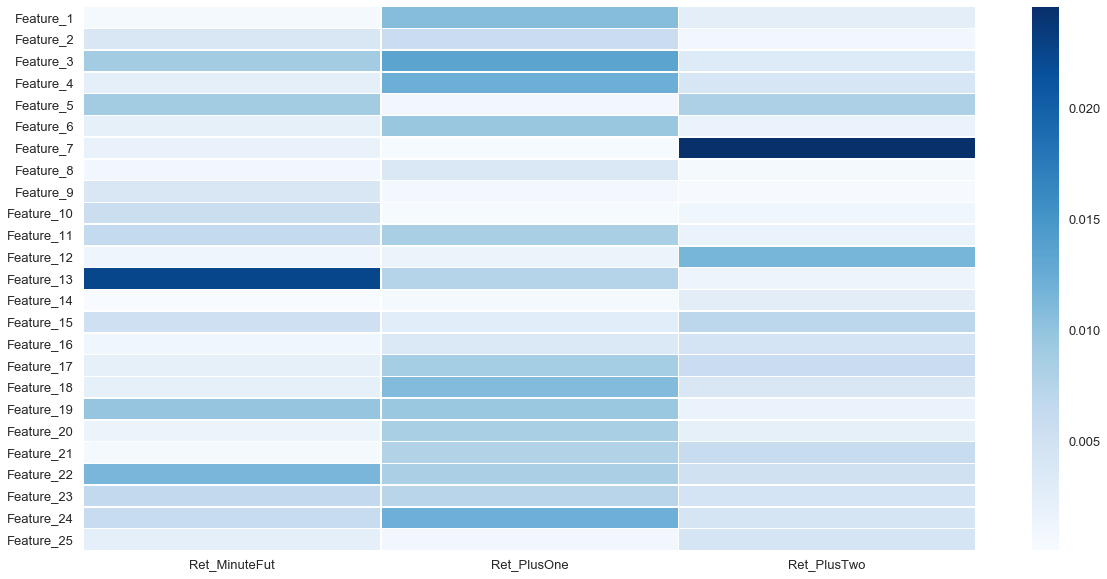

In [42]:
fig, ax = plt.subplots(figsize=[20,10])
ax = sns.heatmap(corr.loc['Feature_1':'Feature_25','Ret_MinuteFut':'Ret_PlusTwo'], linewidth=0.5,cmap="Blues")

Text(0.5,0.98,'Korrelation von Feature_7')

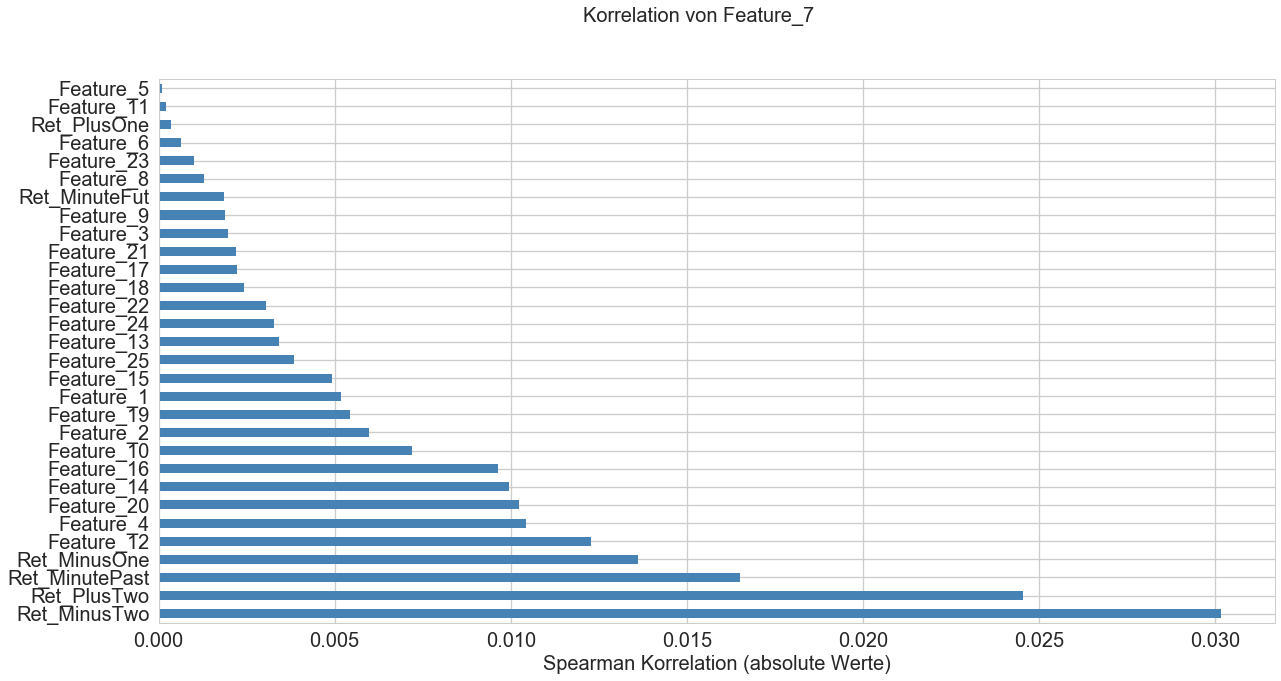

In [43]:


sns.set(style="whitegrid")
sns.set_context("talk")
fig, ax1 = plt.subplots(figsize=(20, 10))


#fig.savefig('example.png')
corr['Feature_7'].sort_values(ascending = False)[1:].plot.barh(fontsize =20,color=['steelblue'])
#ax1.set_title('Trainingsdaten',fontsize=20)
ax1.set_xlabel('Spearman Korrelation (absolute Werte)',fontsize=20)


fig.suptitle('Korrelation von Feature_7',fontsize=20)

#fig.savefig('BA_graphs/Corr_Fet_7.jpeg')

In [44]:
corr['Ret_MinuteFut'].sort_values(ascending = False)

Ret_MinuteFut     1.000000
Ret_MinusTwo      0.044622
Ret_PlusOne       0.043101
Ret_MinusOne      0.025998
Feature_13        0.022537
Ret_MinutePast    0.020598
Feature_22        0.011444
Feature_19        0.009762
Feature_3         0.008907
Feature_5         0.008883
Feature_23        0.006403
Feature_11        0.006314
Feature_24        0.006093
Feature_10        0.005686
Feature_15        0.005171
Ret_PlusTwo       0.003982
Feature_9         0.003883
Feature_2         0.003841
Feature_4         0.002415
Feature_25        0.002335
Feature_17        0.002242
Feature_18        0.002222
Feature_6         0.002174
Feature_7         0.001855
Feature_20        0.001531
Feature_12        0.001280
Feature_16        0.001105
Feature_8         0.000744
Feature_1         0.000481
Feature_21        0.000454
Feature_14        0.000066
Name: Ret_MinuteFut, dtype: float64

## Exploring Feature 7

In [45]:
exp_train = train.copy()
exp_train['Train or Test'] = 'Train'
exp_test = test.copy()
exp_test['Train or Test'] = 'Test'


In [46]:


train_count= pd.DataFrame(train.Feature_7.value_counts())
train_count.columns=['count']
train_count['Train or Test'] = 'r'


test_count= pd.DataFrame(test.Feature_7.value_counts())
test_count.columns=['count']
test_count['Train or Test'] = 'b'


exp_fet7 = pd.concat([train_count,test_count]).sort_index().reset_index()
exp_fet7.columns=['Feature_7','count','Train or Test']
exp_fet7

,Feature_7,count,Train or Test
0,26,58,b
1,64,41,b
2,138,38,b
3,200,46,b
4,227,55,b
5,233,61,b
6,283,34,b
7,338,58,r
8,395,55,b
9,421,57,b


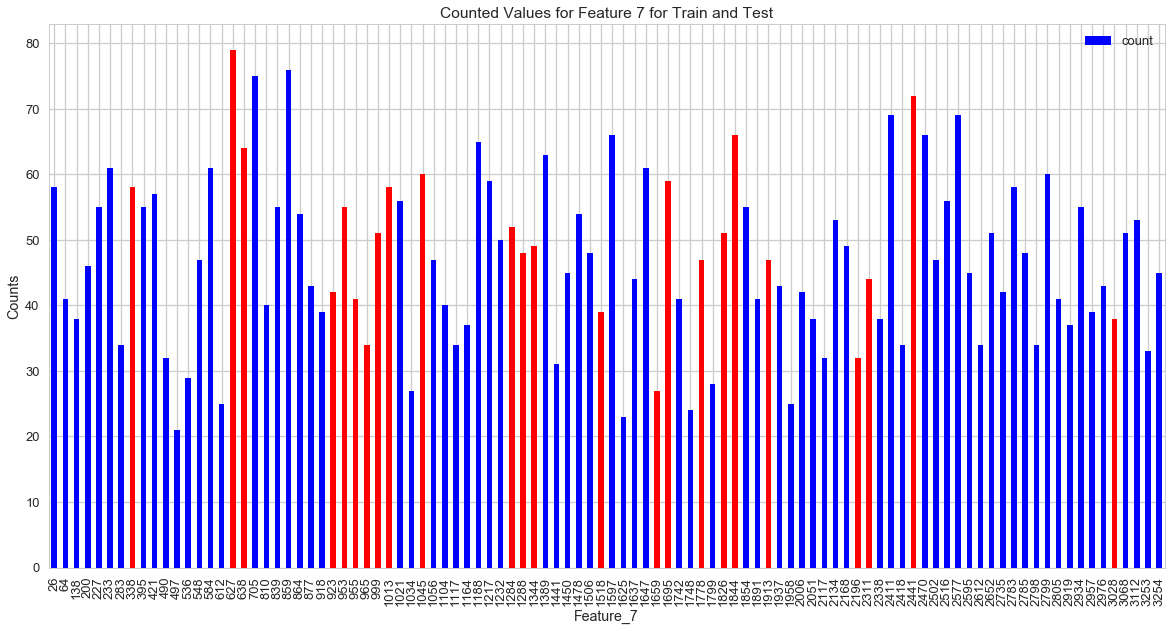

In [24]:
#plt.plot(date = exp_fet7, x='Feature_7',y='count')


fig, ax = plt.subplots(figsize=(20,10)) #define plot area
ax.set_title('Counted Values for Feature 7 for Train and Test')
ax.set_xlabel('Ausprägung für Feature_7')
ax.set_ylabel('Auszug der 100 Ausprägungen von Feature 7')
exp_fet7.iloc[:100,:].plot(kind="bar", x="Feature_7", y = 'count', ax = ax, color=exp_fet7['Train or Test'])


In [16]:
#sns.barplot(x=exp_fet7["Feature_7"], y=exp_fet7["count"],hue=exp_fet7["Train or Test"])

In [57]:
exp_fet7_2= pd.DataFrame(pd.concat([exp_train,exp_test]).loc[:,['Feature_7','Train or Test']])
exp_fet7_2

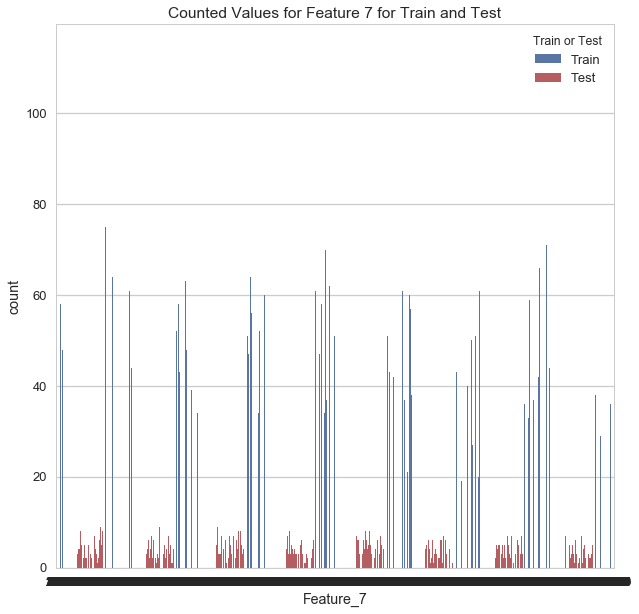

In [67]:
palette=["C0", "C2"]

fig, ax = plt.subplots(figsize=(10,10)) #define plot area
ax.set_title('Counted Values for Feature 7 for Train and Test')
ax.set_xlabel('Ausprägung für Feature_7')
ax.set_ylabel('Auszug der 100 Ausprägungen von Feature 7')
ax = sns.countplot(x='Feature_7', data=exp_fet7_2,hue='Train or Test',palette = palette)


## Feature 5

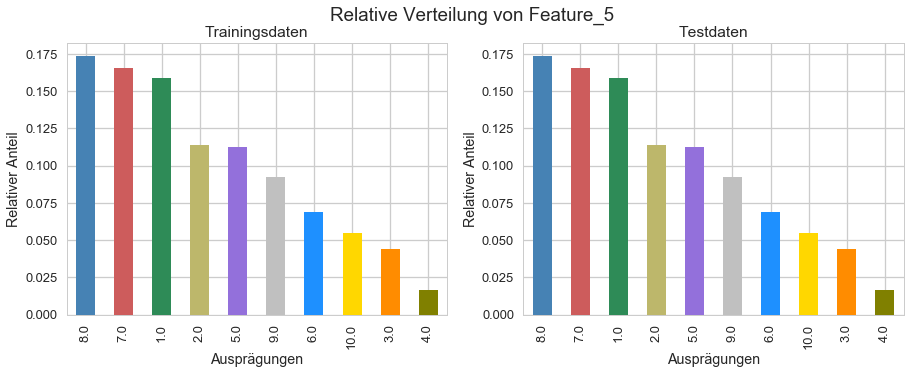

In [100]:
feat_5_counts_train = train['Feature_5'].value_counts(normalize=True)
feat_5_counts_test = test['Feature_5'].value_counts(normalize=True)
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(15,5))
ax1.set_title('Trainingsdaten')
ax1.set_xlabel('Ausprägungen')
ax1.set_ylabel('Relativer Anteil')
feat_5_counts_train.plot.bar(ax =ax1, color=['steelblue','indianred','seagreen','darkkhaki','mediumpurple'
                                             ,'silver','dodgerblue','gold','darkorange','olive'])
#
ax2.set_title('Testdaten')
ax2.set_xlabel('Ausprägungen')
ax2.set_ylabel('Relativer Anteil')
feat_5_counts_train.plot.bar(ax =ax2, color=['steelblue','indianred','seagreen','darkkhaki','mediumpurple'
                                             ,'silver','dodgerblue','gold','darkorange','olive'])

fig.suptitle('Relative Verteilung von Feature_5')
fig.savefig('BA_graphs/Feature 5.jpeg')



In [101]:
display(feat_5_counts_train.min(), feat_5_counts_train.max())
display(feat_5_counts_test.min(), feat_5_counts_test.max())

0.01665

0.173575

0.018291666666666668

0.17676666666666666

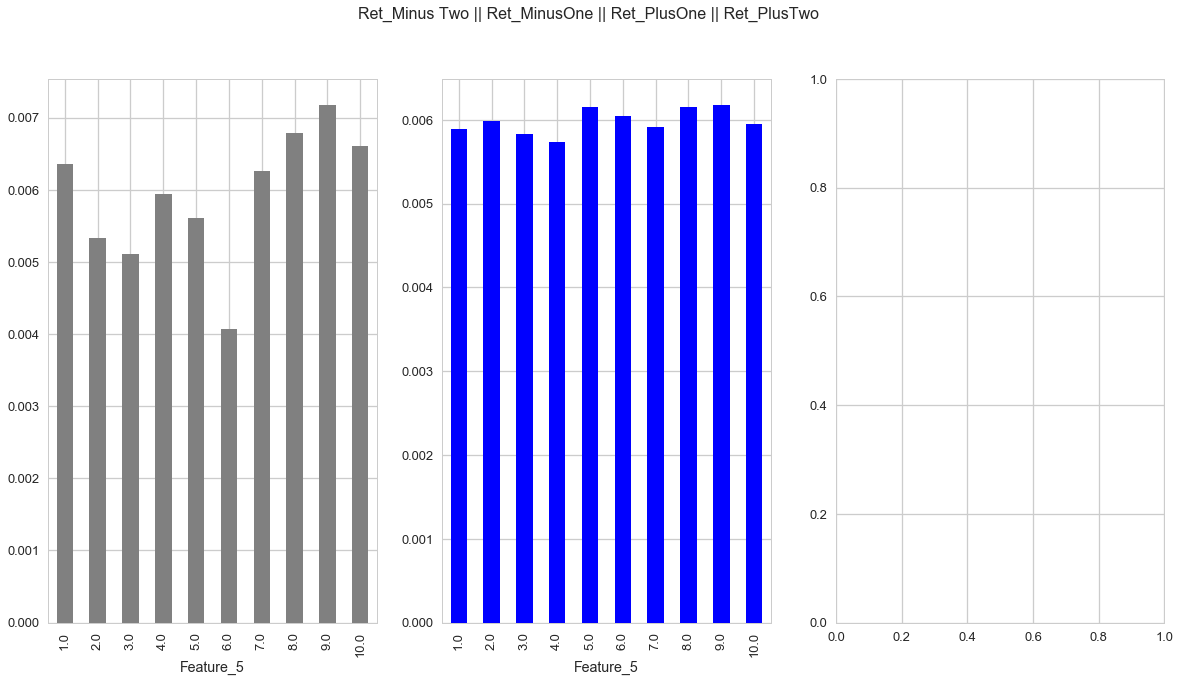

In [115]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(20,10))
plt.suptitle('Ret_Minus Two || Ret_MinusOne || Ret_PlusOne || Ret_PlusTwo', fontsize=16)


features.groupby('Feature_5').Ret_MinutePast.mad().plot(kind ='bar', color = 'gray',ax=ax1)
features.groupby('Feature_5').Ret_MinutePast_Test.mad().plot(kind ='bar', color = 'blue',ax=ax2)


In [113]:
features.head()

,Feature_5,Feature_7,Ret_MinusOne,Ret_MinusTwo,Ret_MinutePast,Ret_MinutePast_Test
Id,,,,,,
1,8.0,75751,-0.010770,0.055275,-0.024969,0.001609
2,3.0,17369,0.002987,0.009748,-0.008117,-0.003282
3,9.0,8277,0.006181,0.003077,-0.000649,0.003420
4,5.0,22508,0.014106,0.000984,0.001272,0.001595
5,7.0,22423,0.011065,-0.018224,-0.002331,0.002555


## Zeitreihen und renditen

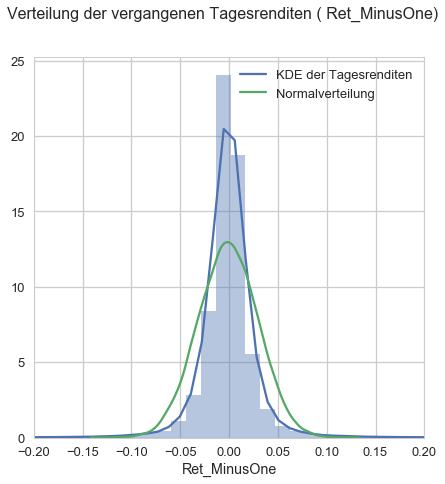

In [472]:
from scipy.stats import norm
from matplotlib.lines import Line2D

Tagesrenditen = pd.concat([features.Ret_MinusOne]).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(7, 7))
#fig.savefig('example.png')
sns.distplot(Tagesrenditen, ax=ax1, bins=90,kde_kws={"bw":0.01 ,"label": "KDE der Tagesrenditen","kernel":"gau"})
#sns.distplot(Tagesrenditen2, ax=ax1, bins=300,kde_kws={"bw":0.005 ,"label": "Tagesrenditen2"})
sns.distplot(x,kde=True,hist=False,label='Normalverteilung')

#ax1.set_title('Trainingsdaten',fontsize=20)
#ax1.set_xlabel('XXX',fontsize=20)
plt.xlim(-0.2,0.2)
#plt.ylim(0,0.2)

fig.suptitle('Verteilung der vergangenen Tagesrenditen ( Ret_MinusOne)',fontsize=16)
#ax.legend(loc='best')
fig.savefig('BA_graphs/KDE_Ret_MinusOne.jpeg')

In [479]:
x = np.random.standard_normal(features.Ret_MinusOne.size)
x = (features.Ret_MinusOne.std() * x) + features.Ret_MinusOne.mean()

In [482]:
features.Ret_MinusOne.std()
features.Ret_MinusOne.mean()
features.Ret_MinusOne.skew()
from scipy import stats
stats.jarque_bera(features.Ret_MinusOne)

(6968193.238815164, 0.0)

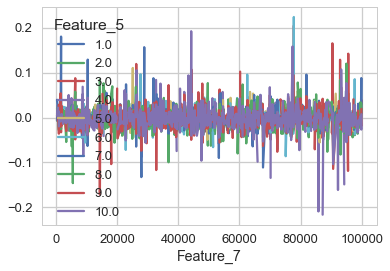

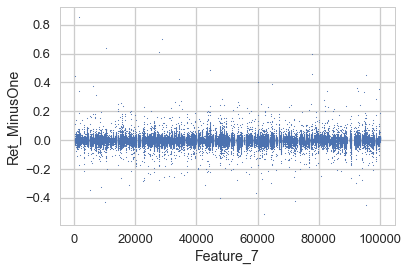

In [259]:
features.groupby(['Feature_7','Feature_5']).mean().reset_index().set_index('Feature_7')[['Feature_5','Ret_MinusOne']]
features.groupby(['Feature_7','Feature_5']).mean()['Ret_MinusOne'].unstack().plot()
features.plot.scatter(x='Feature_7',y='Ret_MinusOne',s=0.5)

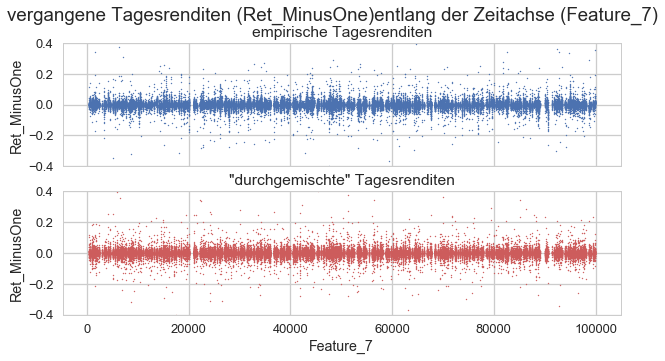

In [524]:
vol_clust = pd.DataFrame(features.Ret_MinusOne.sample(frac=1,random_state =2).values,columns=['Ret_MinusOne'])
vol_clust['Feature_7'] = features.Feature_7.values

fig, [ax1,ax2] = plt.subplots(2,1,figsize=(10,5),sharex=True)
fig.suptitle('vergangene Tagesrenditen (Ret_MinusOne)entlang der Zeitachse (Feature_7)')

features.plot.scatter(x='Feature_7',y='Ret_MinusOne',s=1,ax=ax1)
ax1.set_ylim(-0.4,0.4)
ax1.set_title('empirische Tagesrenditen')

vol_clust.plot.scatter(x='Feature_7',y='Ret_MinusOne',s=1,ax=ax2,c='indianred')
ax2.set_ylim(-0.4,0.4)
ax2.set_title('"durchgemischte" Tagesrenditen')
fig.savefig('BA_graphs/Volatilitätscluster.jpeg')

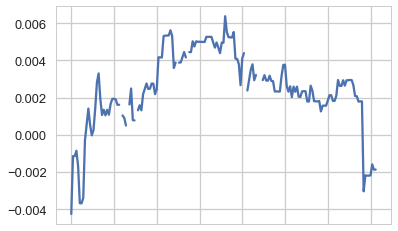

In [611]:
train.loc[:,'Ret_2':'Ret_180'].sample(2,random_state=8).index

Int64Index([28023, 19677], dtype='int64', name='Id')

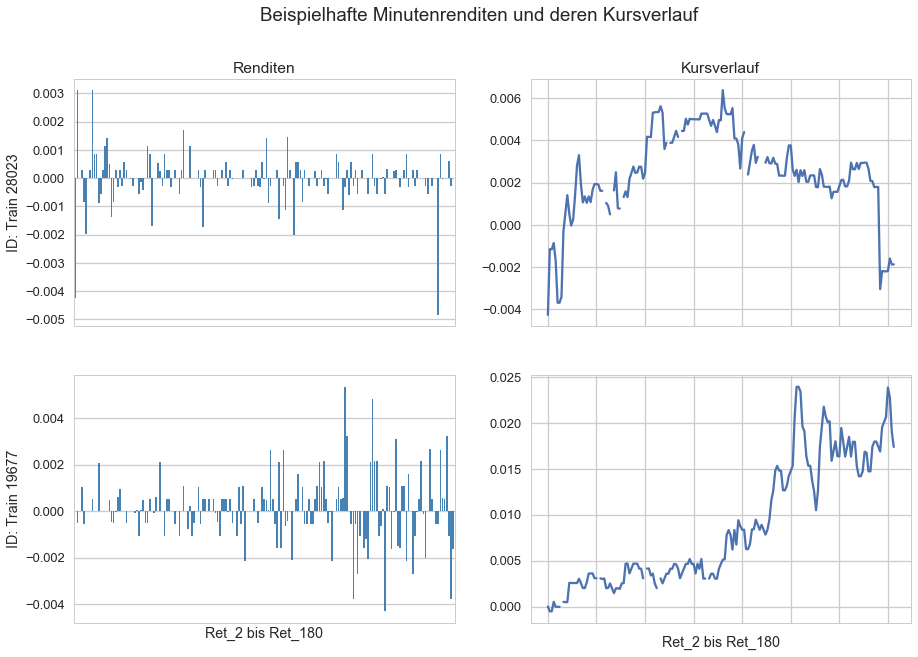

In [622]:
first = train.loc[:,'Ret_2':'Ret_180'].sample(2,random_state=8).iloc[0,:] #id: 28023
second = train.loc[:,'Ret_2':'Ret_180'].sample(2,random_state=8).iloc[1,:] #id: 19677


fig, [[ax1,ax2], [ax3, ax4]] = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Beispielhafte Minutenrenditen und deren Kursverlauf')

first.plot.bar(ax=ax1,color = 'steelblue',width =0.8)
ax1.legend_ = None
ax1.xaxis.set_ticks([])
ax1.set_ylabel('ID: Train 28023')
ax1.set_title('Renditen')

first.cumsum().plot(ax=ax2)
ax2.set_title('Kursverlauf')

second.plot.bar(ax=ax3,color='steelblue',width=0.8)
ax3.xaxis.set_ticks([])
ax3.set_xlabel('Ret_2 bis Ret_180')
ax3.set_ylabel('ID: Train 19677')

second.cumsum().plot(ax=ax4)
ax4.set_xlabel('Ret_2 bis Ret_180')
#ax1.set_xlim(auto=True)

fig.savefig('BA_graphs/Minutenrenditen.jpeg')

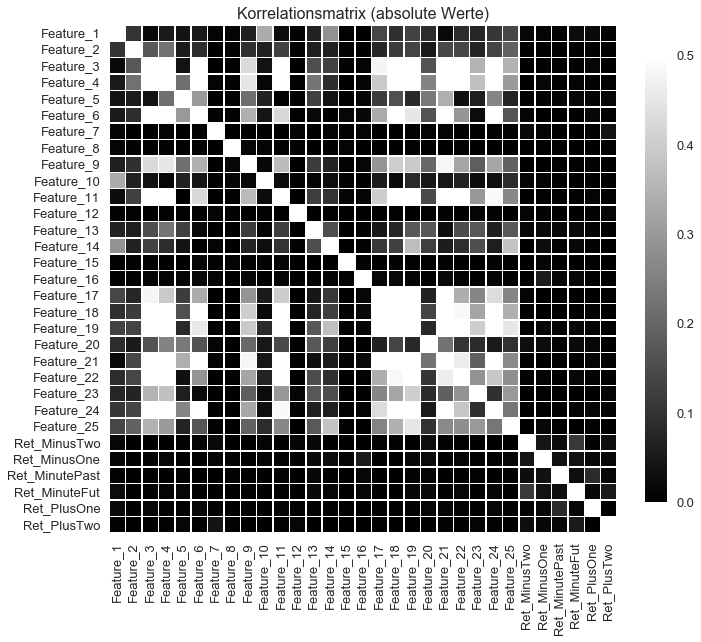

In [723]:
#Korrelationen
corr = abs(featureset.corr(method='pearson'))
fig, ax = plt.subplots(figsize=[10,10])
ax = sns.heatmap(corr, linewidth=0.5, vmin=0, vmax=0.5, square=True,cmap='gray',cbar_kws={'fraction': 0.04}) #

ax.set_title('Korrelationsmatrix (absolute Werte)',fontsize=16)
fig.savefig('BA_graphs/Korrelationen.jpeg')

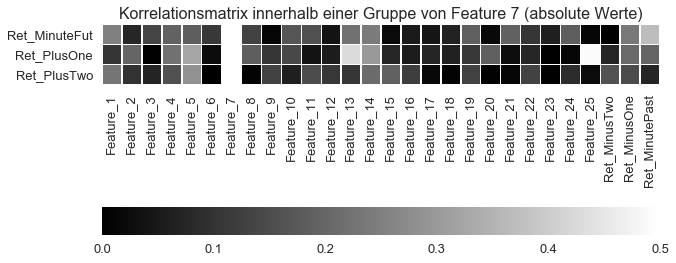

In [858]:
groups = train.Feature_7.value_counts().sort_values(ascending=False)

corr_1 = abs(featureset.groupby('Feature_7').get_group(groups.index[0]).corr(method='pearson'))

fig, ax1 = plt.subplots(figsize=[10,15])
sns.heatmap(corr_1.loc['Ret_MinuteFut':'Ret_PlusTwo','Feature_1':'Ret_MinutePast'], linewidth=0.5, vmin=0, vmax=0.5, square=True,cmap='gray',ax=ax1,cbar_kws={"orientation":'horizontal'}) #,'label':'Korrelation'
ax1.set_title('Korrelationsmatrix innerhalb einer Gruppe von Feature 7 (absolute Werte)',fontsize=16)


fig.savefig('BA_graphs/Korrelationsmatrix Feature7.jpeg')


In [861]:
groups = train.Feature_7.value_counts().sort_values(ascending=False)
groups.index[0:5]

values=[]

for group in groups.index:
    corr = featureset.groupby('Feature_7').get_group(group).corr(method='pearson').Ret_MinutePast
    values.append(corr.Ret_MinuteFut)
values

[0.3706953109997652,
 0.009065373511608124,
 -0.04071847631780507,
 0.05745156572181276,
 0.10427417601665515,
 0.3430668106561195,
 -0.2786452603960329,
 0.37137852140083827,
 0.1947729462579353,
 0.41688361478039015,
 -0.2349221767997361,
 -0.6589375523268791,
 -0.2872756988215815,
 -0.22934577300060138,
 0.05892653577664143,
 -0.24776218800422597,
 -0.10668938340529681,
 0.018734402416890752,
 -0.06877438617368682,
 -0.5338952791706566,
 -0.4941220789209137,
 -0.09530527300332951,
 -0.03536378193272994,
 0.12023598882909138,
 -0.06705872884106229,
 0.37526645723148494,
 -0.3178355560280277,
 0.4461472356438863,
 -0.05568496210915989,
 0.059563464646681705,
 -0.2951226830051155,
 0.1652798490870094,
 0.22517747727099605,
 -0.019152963237640423,
 0.1252060607748346,
 -0.2826082978571412,
 0.01984992967352175,
 0.2482741998182744,
 0.15140759622842873,
 0.12558617607517306,
 -0.12573147831159734,
 -0.28611763014812175,
 -0.29689896729476756,
 -0.09041703237332169,
 -0.1359574182299561,

In [872]:
xxx = abs(pd.DataFrame(values,columns=['Values'],index=groups.index.values))
xxx['mean'] = train.groupby('Feature_7').Feature_25.mean()
xxx['mad'] = train.groupby('Feature_7').Feature_25.mad()
xxx.Values.mean()

0.20759809439684146

In [804]:
train.groupby('Feature_7').get_group(37168).Feature_25.mean()


-0.5216790408069597

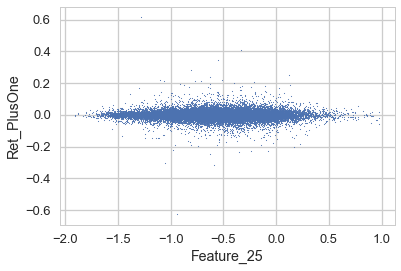

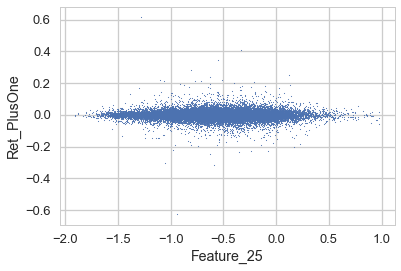

In [860]:
train.loc[train.Feature_25<1].plot.scatter(x='Feature_25',y='Ret_PlusOne',s=0.5)
df = (train.loc[train.Feature_25<1].loc[:,['Feature_5','Feature_25','Ret_PlusOne']])
df.plot.scatter(x='Feature_25',y='Ret_PlusOne',s=0.5)


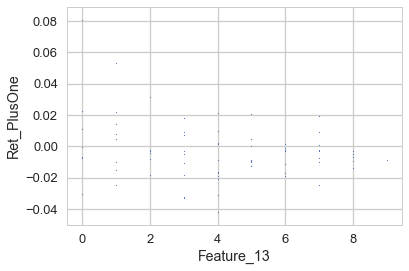

In [837]:
train.groupby('Feature_7').get_group(8879).plot.scatter(x='Feature_13',y='Ret_PlusOne',s=0.5)

In [840]:
train.Feature_25.isna().sum()

655

In [859]:
groups

37168    114
82865    109
82613     99
38084     92
7545      90
70906     88
73743     88
64788     87
56222     85
76033     85
69366     85
34245     85
44322     84
68395     83
3349      82
69787     82
68443     81
92524     81
40654     81
58878     81
627       79
25571     79
15190     77
51499     76
29262     76
79444     76
53301     75
8879      75
57083     75
38839     75
        ... 
87195     23
88766     23
88306     23
16618     22
80056     22
70640     22
43741     22
87853     22
86830     22
61516     21
75751     21
45426     21
62914     21
30162     21
94953     21
15119     20
60779     20
45561     20
72387     19
18417     19
79998     19
23689     19
33187     19
47706     19
63945     18
75790     18
89151     18
98851     17
54231     16
75682     13
Name: Feature_7, Length: 824, dtype: int64